In [1]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities

['manggar',
 'lorengau',
 'clyde river',
 'sentyabrskiy',
 'aklavik',
 'hermanus',
 'atar',
 'rikitea',
 'atuona',
 'bridlington',
 'douentza',
 'puerto ayora',
 'khatanga',
 'nikolskoye',
 'illoqqortoormiut',
 'lata',
 'taolanaro',
 'manokwari',
 'carutapera',
 'bengkulu',
 'juneau',
 'rio gallegos',
 'busselton',
 'albany',
 'saint-philippe',
 'guerrero negro',
 'inta',
 'cape town',
 'ati',
 'port alfred',
 'dikson',
 'kenai',
 'port hardy',
 'green river',
 'cozumel',
 'vila',
 'chokurdakh',
 'ullal',
 'gandai',
 'ushuaia',
 'kirakira',
 'praxedis guerrero',
 'punta arenas',
 'irece',
 'marsa matruh',
 'tuktoyaktuk',
 'armacao dos buzios',
 'zarubino',
 'labuhan',
 'mahbubabad',
 'alugan',
 'geraldton',
 'huron',
 'tandalti',
 'cherskiy',
 'pringsewu',
 'vaini',
 'oeiras',
 'caimito',
 'laguna',
 'ostrovnoy',
 'nampula',
 'avarua',
 'hilo',
 'rapid valley',
 'miramar',
 'talnakh',
 'jamestown',
 'airai',
 'ribeira grande',
 'georgetown',
 'nuuk',
 'mahibadhoo',
 'santa cruz del nor

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={api_key}&units={units}&q="

In [15]:
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
    except KeyError:
        continue
        

In [18]:
weather_dict = {
    "Latitude": lat,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,-2.88,27.8,89,64,2.26
1,-2.02,28.8,100,32,3.46
2,70.47,2.0,100,90,4.60
3,-2.88,27.8,89,64,2.26
4,-2.02,28.8,100,32,3.46


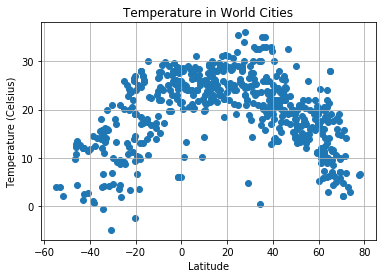

In [21]:
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperature In World Cities.png")

# Show plot
plt.show()

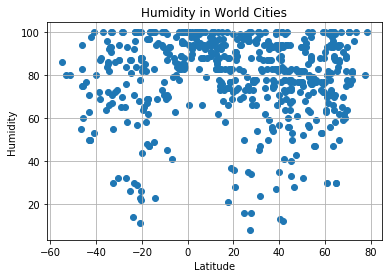

In [22]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity In World Cities.png")

# Show plot
plt.show()

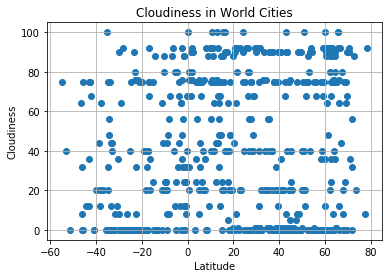

In [23]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness In World Cities.png")

# Show plot
plt.show()

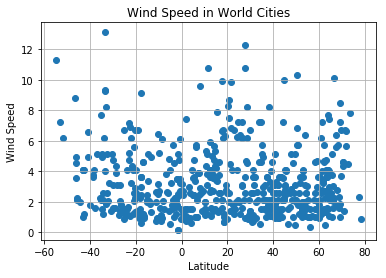

In [24]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind Speed In World Cities.png")

# Show plot
plt.show()

In [25]:
weather_data.to_csv('Weather Data.csv', index = False, header = True)